# STAT3612 Lecture 10 - Neural Networks
[Dr. Aijun Zhang](http://www.statsoft.org) - [STAT3612 Statistical Machine Learning](https://ajzhanghku.github.io/Stat3612/)

10 November 2020

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as col
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, accuracy_score

%matplotlib inline  
import warnings
warnings.filterwarnings('ignore')

In [2]:
def plot_decision_boundary(x, y, model, meshsize=100, figsize=(8,8), title=""):
  xmin, xmax = np.min(x[:, 0]), np.max(x[:, 0])
  ymin, ymax = np.min(x[:, 1]), np.max(x[:, 1])
  xgrid = np.linspace(xmin - 0.02*(xmax-xmin), xmax + 0.02*(xmax-xmin), meshsize)
  ygrid = np.linspace(ymin - 0.02*(ymax-ymin), ymax + 0.02*(ymax-ymin), meshsize)
  xx, yy = np.meshgrid(xgrid, ygrid)

  # Obtain labels for each point in mesh. Use last trained model.
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  cmap_light = col.ListedColormap(['#AAFFAA','#AAAAFF','#FFAAAA'])
  cmap_bold = col.ListedColormap(['#00FF00','#0000FF','#FF0000'])

  fig = plt.figure(figsize=figsize)
  Z = Z.reshape(xx.shape)
  plt.clf()
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
  plt.scatter(x[:, 0], x[:, 1], c=y,
              edgecolor='k',cmap=cmap_bold)  
  plt.title(title, fontsize = 20)

# Example 1: Mixture Data from The ESL Book

Prediction Accuracy: 0.785


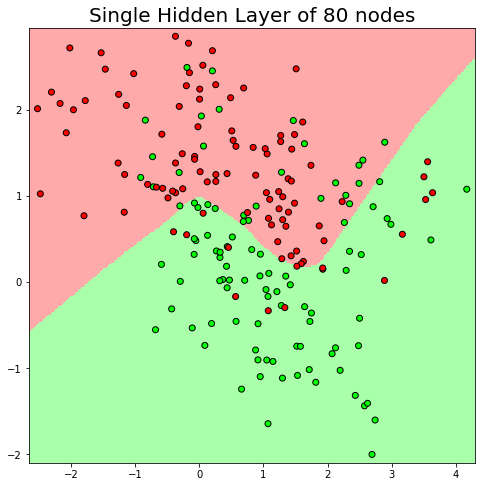

In [3]:
DataX = pd.read_csv("https://raw.githubusercontent.com/ajzhanghku/Stat3612/master/mixture.csv", index_col = [0])
x = DataX.iloc[:,:2].values 
y = DataX.iloc[:,2:].values

random_state = 0

mlp = MLPClassifier(hidden_layer_sizes=[80], activation="relu", max_iter=2000, 
                    solver='adam', learning_rate_init=0.001, random_state=random_state)
mlp.fit(x, y)
print("Prediction Accuracy:", accuracy_score(y, mlp.predict(x)))
plot_decision_boundary(x, y, mlp, meshsize=300,  title = "Single Hidden Layer of 80 nodes")

Prediction Accuracy: 0.825


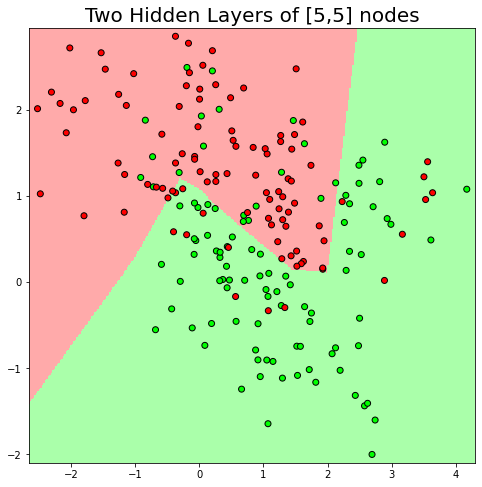

In [4]:
mlp = MLPClassifier(hidden_layer_sizes=[5,5], activation="relu", max_iter=2000, 
                    solver='adam', learning_rate_init=0.001, random_state=random_state+5)
mlp.fit(x, y)
print("Prediction Accuracy:", accuracy_score(y, mlp.predict(x)))
plot_decision_boundary(x, y, mlp, meshsize=300,  title = "Two Hidden Layers of [5,5] nodes")

Prediction Accuracy: 0.905


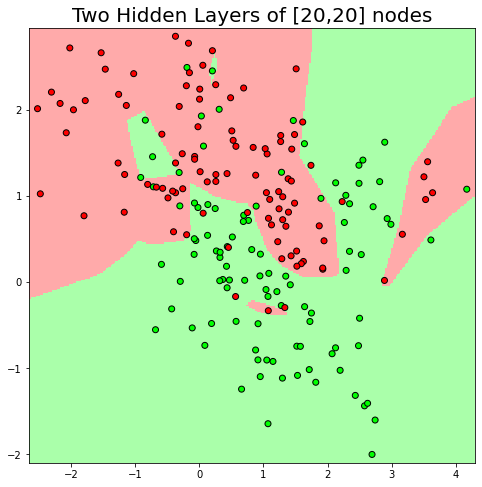

In [5]:
mlp = MLPClassifier(hidden_layer_sizes=[20,20], activation="relu", max_iter=2000, 
                    solver='adam', learning_rate_init=0.001, random_state=random_state)
mlp.fit(x, y)
print("Prediction Accuracy:", accuracy_score(y, mlp.predict(x)))
plot_decision_boundary(x, y, mlp, meshsize=300,  title = "Two Hidden Layers of [20,20] nodes")

Prediction Accuracy: 0.93


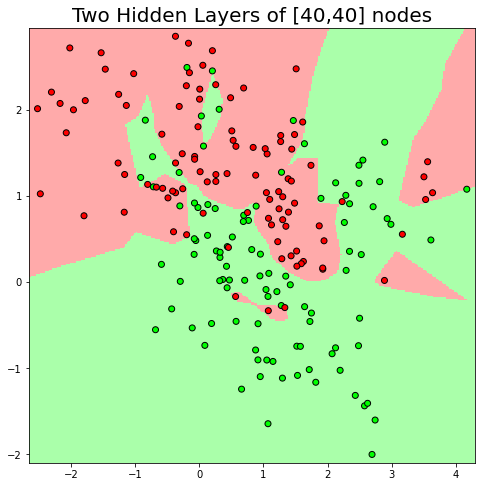

In [6]:
mlp = MLPClassifier(hidden_layer_sizes=[40,40], activation="relu", max_iter=2000, 
                    solver='adam', learning_rate_init=0.001, random_state=random_state)
mlp.fit(x, y)
print("Prediction Accuracy:", accuracy_score(y, mlp.predict(x)))
plot_decision_boundary(x, y, mlp, meshsize=300,  title = "Two Hidden Layers of [40,40] nodes")

# Example 2: Moons Dataset



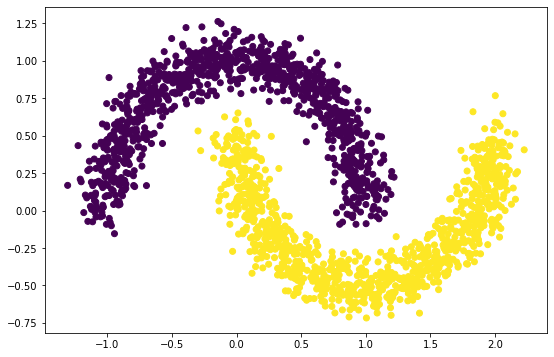

In [7]:
random_state = 0
x, y = make_moons(n_samples=2000, noise=0.1, random_state=random_state)
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=random_state)

plt.figure(figsize=(9, 6))
scatter = plt.scatter(x[:, 0], x[:, 1], c=y)
# plt.legend(*scatter.legend_elements(), loc="upper right")
plt.show()  

MLP Training Accuracy: 0.98625
MLP Testing  Accuracy: 0.98


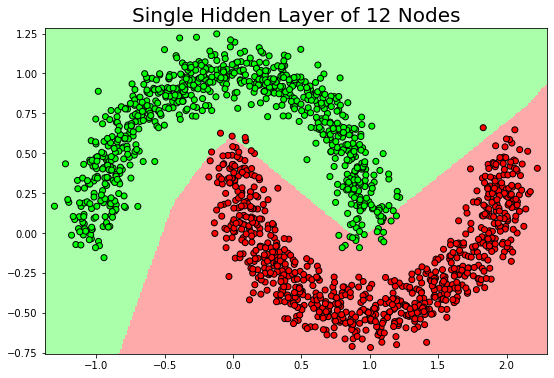

In [8]:
mlp = MLPClassifier(hidden_layer_sizes=[12], max_iter=2000, early_stopping=True, 
                    n_iter_no_change=100, validation_fraction=0.2,
                    solver='adam', activation="relu", random_state=random_state, 
                    learning_rate_init=0.001)
mlp.fit(train_x, train_y)

print("MLP Training Accuracy:", accuracy_score(train_y, mlp.predict(train_x)))
print("MLP Testing  Accuracy:", accuracy_score(test_y, mlp.predict(test_x)))
# print("MLP Testing  AUC:", roc_auc_score(test_y, mlp.predict_proba(test_x)[:, 1]))
plot_decision_boundary(train_x, train_y, mlp, meshsize=300, 
                       figsize=(9,6), title="Single Hidden Layer of 12 Nodes")

MLP Training Accuracy: 0.99875
MLP Testing  Accuracy: 0.995


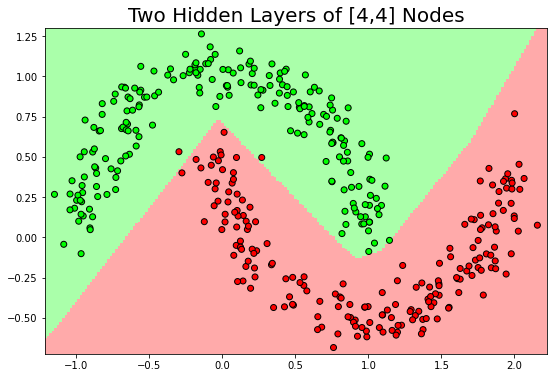

In [9]:
mlp = MLPClassifier(hidden_layer_sizes=[4,4], max_iter=2000, early_stopping=True, 
                    n_iter_no_change=100, validation_fraction=0.2,
                    solver='adam', activation="relu", random_state=random_state, 
                    learning_rate_init=0.001)
mlp.fit(train_x, train_y)

print("MLP Training Accuracy:", accuracy_score(train_y, mlp.predict(train_x)))
print("MLP Testing  Accuracy:", accuracy_score(test_y, mlp.predict(test_x)))
plot_decision_boundary(test_x, test_y, mlp, meshsize=200, 
                       figsize=(9,6), title="Two Hidden Layers of [4,4] Nodes")

# Example 2: Moons Dataset (DNN by TensorFlow Keras Training)

In [10]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
np.random.seed(random_state)
tf.random.set_seed(random_state)

In [11]:
# Sequentially define the model
model = Sequential()                                  
model.add(Dense(4, activation='relu', input_dim=2))  # first hidden layer with 5 nodes
model.add(Dense(4, activation='relu'))               # second hidden layer with 5 nodes
model.add(Dense(1, activation='sigmoid'))             # output layer

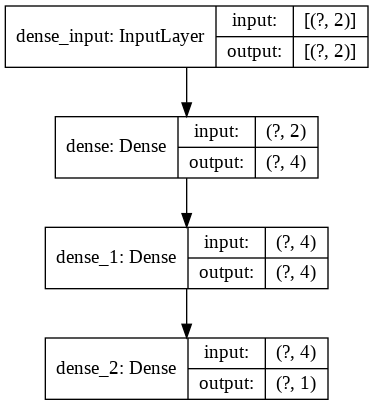

In [12]:
# Visualize DNN architecture
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True, show_layer_names=True)

In [13]:
# Compile the model with Adam optimizer
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(lr=0.01),
              loss='binary_crossentropy',
              metrics=["accuracy", "AUC"])

In [14]:
# train the model on the moon data with given epochs and batch size
history = model.fit(train_x, train_y, 
                    epochs=100, 
                    batch_size=200,
                    validation_data=(test_x, test_y))
score = model.evaluate(test_x, test_y, verbose=0)
print('Testing Accuracy: %0.4f'%score[1])

Epoch 1/100
8/8 [==============================] - 0s 36ms/step - loss: 0.8721 - accuracy: 0.2494 - auc: 0.0740 - val_loss: 0.8042 - val_accuracy: 0.2200 - val_auc: 0.1077
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 0.7584 - accuracy: 0.2463 - auc: 0.2149 - val_loss: 0.7169 - val_accuracy: 0.3100 - val_auc: 0.3278
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6844 - accuracy: 0.4269 - auc: 0.5169 - val_loss: 0.6533 - val_accuracy: 0.5475 - val_auc: 0.7489
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6203 - accuracy: 0.7019 - auc: 0.8360 - val_loss: 0.5952 - val_accuracy: 0.7175 - val_auc: 0.8634
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 0.5525 - accuracy: 0.7713 - auc: 0.8993 - val_loss: 0.5316 - val_accuracy: 0.7400 - val_auc: 0.8905
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 0.4811 - accuracy: 0.7875 - auc: 0.9168 - val_loss: 0.4714 - val_accuracy

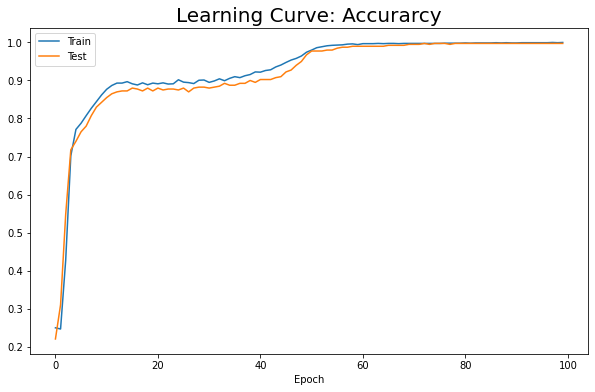

In [15]:
# Learning Curve: Accuracy
plt.figure(figsize=(10,6))
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.title('Learning Curve: Accurarcy', fontsize = 20)
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

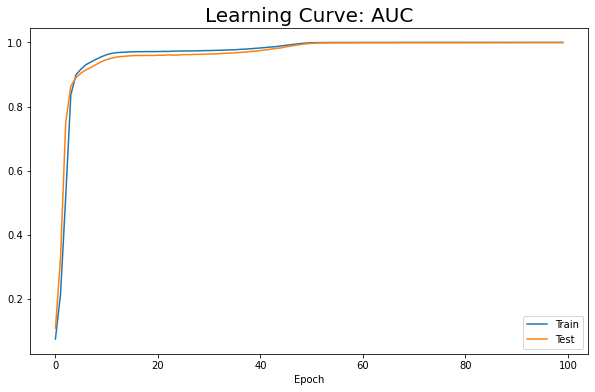

In [16]:
# Learning Curve: AUC
plt.figure(figsize=(10,6))
plt.plot(history.history["auc"])
plt.plot(history.history['val_auc'])
plt.title('Learning Curve: AUC', fontsize = 20)
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

# Example: MNIST Dataset with CNN Prediction

In [17]:
## Load MNIST Dataset 
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

## Preparing Data
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28)
Number of images in x_train 60000
Number of images in x_test 10000


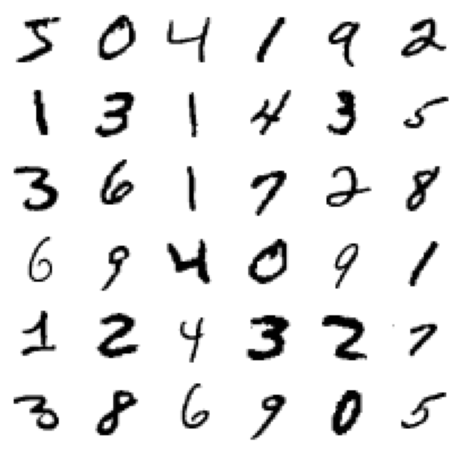

In [18]:
# Data Visualization
plt.figure(figsize=(8,8))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.grid(False)
    plt.axis('off')

In [19]:
%%html
<img src="https://github.com/ajzhanghku/Stat3612/raw/master/ToyCNN.png", width="800"> 

In [20]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

model = Sequential()
model.add(Conv2D(filters = 10, kernel_size=(5, 5), input_shape=(28, 28, 1), padding='valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters = 20, kernel_size=(5, 5), padding='valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dropout(0.25))
model.add(Dense(100, activation=tf.nn.relu))
model.add(Dense(10,activation=tf.nn.softmax))

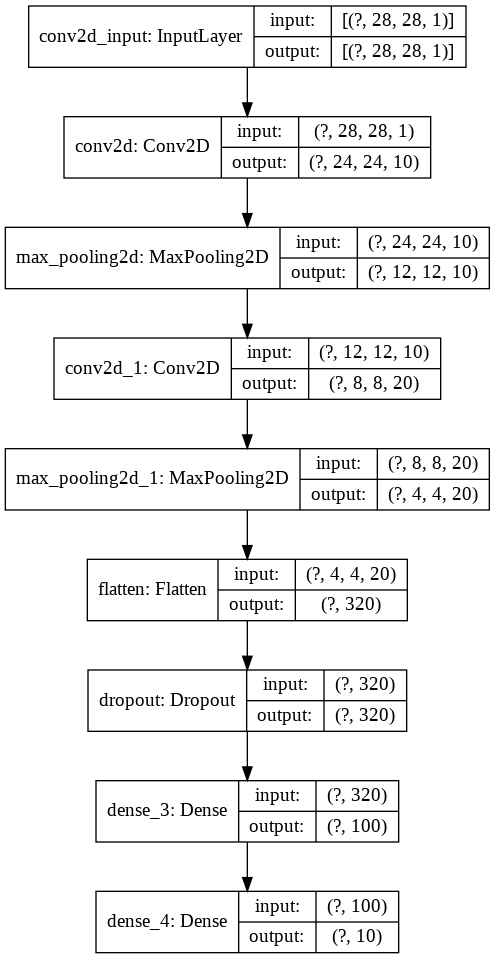

In [22]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True, show_layer_names=True)

In [23]:
model.compile(optimizer='adam', # optimizer=Adam(lr=0.01),
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [35]:
history = model.fit(x=x_train, y=y_train, 
                    epochs=30,
                    batch_size=200,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Testing accuracy: %0.4f'%score[1])

Epoch 1/30
300/300 [==============================] - 26s 85ms/step - loss: 0.0103 - accuracy: 0.9962 - val_loss: 0.0339 - val_accuracy: 0.9912
Epoch 2/30
300/300 [==============================] - 25s 85ms/step - loss: 0.0098 - accuracy: 0.9965 - val_loss: 0.0364 - val_accuracy: 0.9916
Epoch 3/30
300/300 [==============================] - 25s 85ms/step - loss: 0.0087 - accuracy: 0.9969 - val_loss: 0.0343 - val_accuracy: 0.9915
Epoch 4/30
300/300 [==============================] - 25s 85ms/step - loss: 0.0106 - accuracy: 0.9961 - val_loss: 0.0312 - val_accuracy: 0.9915
Epoch 5/30
300/300 [==============================] - 26s 85ms/step - loss: 0.0088 - accuracy: 0.9969 - val_loss: 0.0346 - val_accuracy: 0.9918
Epoch 6/30
300/300 [==============================] - 25s 85ms/step - loss: 0.0087 - accuracy: 0.9967 - val_loss: 0.0337 - val_accuracy: 0.9921
Epoch 7/30
300/300 [==============================] - 25s 85ms/step - loss: 0.0092 - accuracy: 0.9965 - val_loss: 0.0343 - val_accuracy:

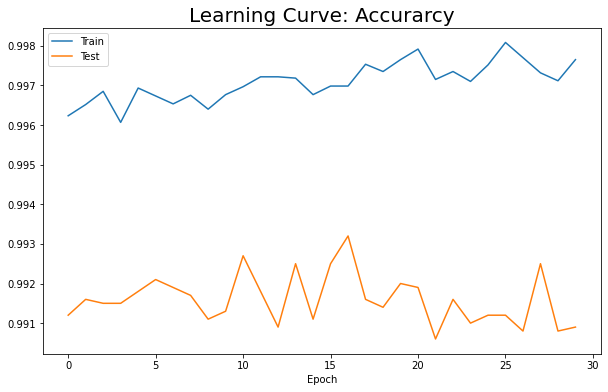

In [36]:
# Learning Curve: Accuracy
plt.figure(figsize=(10,6))
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.title('Learning Curve: Accurarcy', fontsize = 20)
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()